한국어로하는 문장을 입력하면 그에 따른 답변을 출력하는 chatbot 프로젝트 입니다. 

## module import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Korpora import Korpora # 한국어 chatbot 말뭉치


## 1. 데이터 수집하기

### 챗봇의 병렬 데이터 받아오기

-  '**korean_chatbot_data**': 'songys@github 님이 만드신 챗봇 문답 데이터'를 사용하겠습니다. 

In [2]:
Korpora.corpus_list()

{'kcbert': 'beomi@github 님이 만드신 KcBERT 학습데이터',
 'korean_chatbot_data': 'songys@github 님이 만드신 챗봇 문답 데이터',
 'korean_hate_speech': '{inmoonlight,warnikchow,beomi}@github 님이 만드신 혐오댓글데이터',
 'korean_parallel_koen_news': 'jungyeul@github 님이 만드신 병렬 말뭉치',
 'korean_petitions': 'lovit@github 님이 만드신 2017.08 ~ 2019.03 청와대 청원데이터',
 'kornli': 'KakaoBrain 에서 제공하는 Natural Language Inference (NLI) 데이터',
 'korsts': 'KakaoBrain 에서 제공하는 Semantic Textual Similarity (STS) 데이터',
 'kowikitext': 'lovit@github 님이 만드신 wikitext 형식의 한국어 위키피디아 데이터',
 'namuwikitext': 'lovit@github 님이 만드신 wikitext 형식의 나무위키 데이터',
 'naver_changwon_ner': '네이버 + 창원대 NER shared task data',
 'nsmc': 'e9t@github 님이 만드신 Naver sentiment movie corpus v1.0',
 'question_pair': 'songys@github 님이 만드신 질문쌍(Paired Question v.2)',
 'modu_news': '국립국어원에서 만든 모두의 말뭉치: 뉴스 말뭉치',
 'modu_messenger': '국립국어원에서 만든 모두의 말뭉치: 메신저 말뭉치',
 'modu_mp': '국립국어원에서 만든 모두의 말뭉치: 형태 분석 말뭉치',
 'modu_ne': '국립국어원에서 만든 모두의 말뭉치: 개체명 분석 말뭉치',
 'modu_spoken': '국립국어원에서 만든 모두의 말뭉치: 구어 

In [3]:
Korpora.fetch('korean_chatbot_data')

[Korpora] Corpus `korean_chatbot_data` is already installed at /home/ssac27/Korpora/korean_chatbot_data/ChatbotData.csv


In [4]:
root_path = os.path.join(os.getenv('HOME'), 'Korpora')

In [5]:
data = pd.read_csv(root_path +'/korean_chatbot_data/ChatbotData.csv')
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


label 데이터는 불필요하니 제거하겠습니다. 

In [6]:
data.drop(['label'], axis=1, inplace=True)
data

,Q,A
0,12시 땡!,하루가 또 가네요.
1,1지망 학교 떨어졌어,위로해 드립니다.
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.
4,PPL 심하네,눈살이 찌푸려지죠.
...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.
11820,흑기사 해주는 짝남.,설렜겠어요.
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.


In [7]:
questions = data['Q']
answers = data['A']
questions

0                         12시 땡!
1                    1지망 학교 떨어졌어
2                   3박4일 놀러가고 싶다
3                3박4일 정도 놀러가고 싶다
4                        PPL 심하네
                  ...           
11818             훔쳐보는 것도 눈치 보임.
11819             훔쳐보는 것도 눈치 보임.
11820                흑기사 해주는 짝남.
11821    힘든 연애 좋은 연애라는게 무슨 차이일까?
11822                 힘들어서 결혼할까봐
Name: Q, Length: 11823, dtype: object

In [8]:
answers

0                      하루가 또 가네요.
1                       위로해 드립니다.
2                     여행은 언제나 좋죠.
3                     여행은 언제나 좋죠.
4                      눈살이 찌푸려지죠.
                   ...           
11818          티가 나니까 눈치가 보이는 거죠!
11819               훔쳐보는 거 티나나봐요.
11820                      설렜겠어요.
11821    잘 헤어질 수 있는 사이 여부인 거 같아요.
11822          도피성 결혼은 하지 않길 바라요.
Name: A, Length: 11823, dtype: object

데이터 중에서 5만 개만 가져오도록 하고 질문과 답변의 쌍의 형태로 데이터셋을 가공합니다.

In [9]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 20000 
print(MAX_SAMPLES)

20000


---

## 2. 데이터 전처리하기
---
영어 데이터와는 전혀 다른 데이터인 만큼 영어 데이터에 사용했던 전처리와 일부 동일한 전처리도 필요하겠지만 전체적으로는 다른 전처리를 수행해야 할 수도 있습니다.

In [10]:
# 전처리 함수
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (1-9, ㄱ-ㅎ, 가-힣, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    sentence = re.sub(r"[^1-9ㄱ-ㅎ가-힣?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

데이터를 로드하는 동시에 전처리 함수를 호출하여 질문과 답변의 쌍을 전처리합니다.

In [11]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
    id2line = {}
    inputs, outputs= [], []
    
    for Q, A in zip(questions, answers):
            # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
        inputs.append(preprocess_sentence(Q))
        outputs.append(preprocess_sentence(A))

        if len(inputs) >= MAX_SAMPLES:
            return inputs, outputs
    return inputs, outputs

데이터의 샘플 수 확인

In [12]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11823
전체 샘플 수 : 11823


질문과 답변은 병렬적으로 구성되는 데이터셋이므로 두 샘플 수는 정확하게 일치해야 합니다.

둘 다 11823 개의 샘플이 저장되었습니다.


In [13]:
# 10개의 샘플들을 확인해 보겠습니다.
for q,a in zip(questions[:10], answers[:10]):
    print("Q : ",q , "    A : ", a )

Q :  12시 땡 !     A :  하루가 또 가네요 .
Q :  1지망 학교 떨어졌어     A :  위로해 드립니다 .
Q :  3박4일 놀러가고 싶다     A :  여행은 언제나 좋죠 .
Q :  3박4일 정도 놀러가고 싶다     A :  여행은 언제나 좋죠 .
Q :  심하네     A :  눈살이 찌푸려지죠 .
Q :  카드 망가졌어     A :  다시 새로 사는 게 마음 편해요 .
Q :  카드 안돼     A :  다시 새로 사는 게 마음 편해요 .
Q :  맞팔 왜 안하지     A :  잘 모르고 있을 수도 있어요 .
Q :  시간낭비인 거 아는데 매일 하는 중     A :  시간을 정하고 해보세요 .
Q :  시간낭비인데 자꾸 보게됨     A :  시간을 정하고 해보세요 .


?나 .과 같은 구두점들이 단어들과 분리되어 단어와 구두점 사이에는 공백이 추가된 것을 확인할 수 있습니다. 이렇게 함으로써 단어를 토크나이징 하는 과정에서 구두점과 붙어있던 단어들을 하나의 단어로 인식하는 것을 방지할 수 있습니다.

---

## 3. SubwordTextEncoder 사용하기
<br>

한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 **SubwordTextEncoder**를 그대로 사용해보세요.

1. TensorFlow Datasets **SubwordTextEncoder**를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 **정수로 인코딩**한다.
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 **START_TOKEN** 및 **END_TOKEN**을 추가한다.
3. 최대 길이 **MAX_LENGTH**인 40을 넘는 문장들은 필터링한다.
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 **패딩**한다.

### [1] 단어장(Vocabulary) 만들기
---

우선 각 단어에 고유한 정수 인덱스를 부여하기 위해서 단어장(Vocabulary)을 만들어보겠습니다. 단어장을 만들 때는 질문과 답변 데이터셋을 모두 사용하여 만듭니다.

In [14]:

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성.
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

print("단어장 만들기")

단어장 만들기


이때 디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여해 줍니다. 이미 생성된 단어장의 번호와 겹치지 않도록 각각 단어장의 크기와 그보다 1이 큰 수를 번호로 부여하면 됩니다. 

In [15]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [16]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8154]
END_TOKEN의 번호 : [8155]


각각 8,154과 8,155라는 점에서 현재 단어장의 크기가 8,154(0번부터 8,153번)이라는 의미입니다.

두 개의 토큰을 추가해 주었기 때문에 단어장의 크기도 +2가 됩니다. 

In [17]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8156


<br>

### [2] 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)
---
위에서 **tensorflow_datasets**의 **SubwordTextEncoder**를 사용해서 tokenizer를 정의하고 Vocabulary를 만들었다면, **tokenizer.encode()**로 각 단어를 정수로 변환할 수 있고 또는 **tokenizer.decode()**를 통해 정수 시퀀스를 단어 시퀀스로 변환할 수 있습니다.

예를 들어서 1번째 샘플을 **tokenizer.encode()**의 입력으로 사용해서 변환 결과를 봅시다.



In [18]:
# 임의의 1번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 1번째 질문 샘플: {}'.format(tokenizer.encode(questions[1])))
print('정수 인코딩 후의 1번째 답변 샘플: {}'.format(tokenizer.encode(answers[1])))

정수 인코딩 후의 1번째 질문 샘플: [7947, 47, 916, 7930, 995, 1717]
정수 인코딩 후의 1번째 답변 샘플: [1829, 5497, 1]


In [19]:
question_max_len = 24

answer_max_len = 24

단어의 길이 별 비율을 확인하고 패딩할 길이를 정해줍니다.  

questions의 max 길이가 answer의 max 길이보다 짧지만 같은 길이로 해야하기에 answer의 max 길이로 맞추겠습니다.

In [20]:
# 샘플 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 그 길이 안에 해당하는지 계산하는 함수 
def below_threshold_len( max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if (len(s.split()) <= max_len) :
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [21]:
below_threshold_len(question_max_len, questions)
below_threshold_len(answer_max_len, answers)

전체 샘플 중 길이가 24 이하인 샘플의 비율: 1.0
전체 샘플 중 길이가 24 이하인 샘플의 비율: 1.0


In [22]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 24
print(MAX_LENGTH)

24


In [23]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        # 최대 길이 MAX_LENGTH 이하인 경우에만 데이터셋으로 허용
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
  
  # 최대 길이 24으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
    return tokenized_inputs, tokenized_outputs

정수 인코딩 과정을 수행하면서 샘플의 길이가 MAX_LENGTH을 넘는 경우는 샘플들을 필터링해서 일부 샘플이 제외되게 만들어서 일부 샘플이 제외되었습니다.  

샘플 필터링할 때 토큰 2개를 포함해서 24개 이하여야 합니다.

단어장의 크기와 샘플의 개수를 확인해 보겠습니다.

In [24]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8156
필터링 후의 질문 샘플 개수: 11815
필터링 후의 답변 샘플 개수: 11815


### [3] 교사 강요(Teacher Forcing) 사용하기
---
**tf.data.Dataset API**는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API입니다.

이를 적극 사용하기 위해서 질문과 답변의 쌍을 **tf.data.Dataset**의 입력으로 넣어주는 작업을 합니다.


질문과 답변의 쌍을 **tf.data.Dataset API**의 입력으로 사용하여 파이프라인을 구성합니다. 이때, 교사 강요를 위해서 **answers[:, :-1]**를 디코더의 입력값, **answers[:, 1:]**를 디코더의 레이블로 사용합니다.

In [26]:
BATCH_SIZE = 64
BUFFER_SIZE = len(answers)

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


---

## 4. 모델 구성하기
위 실습 내용을 참고하여 트랜스포머 모델을 구현해 봅시다.

<br>

### 포지셔널 인코딩 레이어

같은 단어라도 그 단어가 문장의 몇 번째 어순으로 입력되었는지를 모델에 추가로 알려 주기 위해, 단어의 임베딩 벡터에다가 **위치 정보를 가진 벡터(Positional Encoding)** 값을 더해서 모델의 입력으로 삼는다.  

- 같은 단어라고해도 각각 다른 위치에 등장했다는 사실을 모델에 알려주기 위해 사용한다.

#### 포지셔널 인코딩 레이어(Positional Encoding Layer) 구현하기

In [29]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

행의 크기가 30, 열의 크기가 256인 행렬을 그려봅시다. 이를테면, 최대 문장의 길이가 30이고 워드 임베딩 차원을 256로 하는 모델의 입력 벡터 모양이 이와 같을 것입니다.

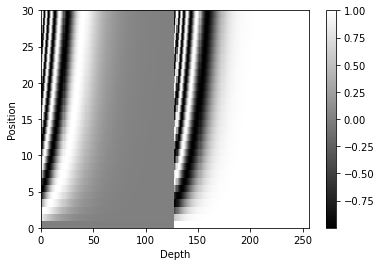

In [32]:
sample_pos_encoding = PositionalEncoding(30, 256)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='gray') # cmap='RdBu'
plt.xlabel('Depth')
plt.xlim((0, 256))
plt.ylabel('Position')
plt.colorbar()
plt.show()

###  스케일드 닷 프로덕트 어텐션
- 단어들 간의 유사도를 구하는 매커니즘을 말합니다.

 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고, 유사도를 0과 1사이의 값으로 Normalize해주기 위해서 소프트맥스 함수를 사용합니다. 여기까지가 Q와 K의 유사도를 구하는 과정이라고 볼 수 있겠습니다. 여기에 문장 행렬 V와 곱하면 **어텐션 값(Attention Value)**를 얻습니다.

### $$ Attention(Q,K,V) = softmax \left( \frac {QK^T} {\sqrt{d_k}} \right) V $$


이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식으로 Q와 K의 유사도를 구하였다고 하여 **스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention)**이라고 합니다.

#### 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention) 구현하기

In [35]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    #어텐션 가중치를 계산.
    matmul_qk = tf.matmul(query, key, transpose_b=True)

      # scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # add the mask to zero out padding tokens
    if mask is not None:
        logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    output = tf.matmul(attention_weights, value)

    return output

### 병렬로 어텐션 수행하기

트랜스포머에서 **num_heads**라는 변수는 기계가 몇 개의 똑똑한 머리를 사용할지, 다시 말해 병렬적으로 몇 개의 어텐션 연산을 수행할지를 결정하는 하이퍼파라미터입니다.


**d_model**이 임베딩 차원이라면, 결국 트랜스포머의 초기 입력인 문장 행렬의 크기는 문장의 길이를 행으로, **d_model**은 열의 크기로 가집니다.

트랜스포머는 이렇게 입력된 문장 행렬을 **num_heads**의 수만큼 쪼개서 어텐션을 수행하고, 이렇게 얻은 **num_heads**의 개수만큼의 어텐션 값 행렬을 다시 하나로 **concatenate**합니다.

이와 같이 어텐션을 병렬로 수행하는 것을 **멀티 헤드 어텐션**이라고 부릅니다.

**멀티 헤드 어텐션**을 구현하면 다음과 같습니다.

내부적으로는 **스케일드 닷 프로덕트 어테션 함수**를 호출합니다.

#### 멀티 헤드 어텐션(multi-head attention) 구현하기

In [36]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다.
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다.
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # final linear layer
        outputs = self.dense(concat_attention)

        return outputs

## 마스킹
**마스킹(Masking)**이란, 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법입니다.

트랜스포머에서는 어텐션을 위해서 크게 두 가지 마스킹을 사용합니다. 

### 패딩 마스킹(Padding Masking)  
---

첫 번째 마스킹은 패딩 토큰(Padding token)을 이용한 방법입니다.


패딩을 한 문장에서 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있습니다. **패딩 마스킹**은 이를 위해 숫자 0인 위치를 체크합니다.


- 패딩 : 정해준 길이보다 짦은 문장의 경우에는 숫자 0을 채워서 전체 문장의 길이를 맞춰주는 자연어 기법

In [38]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

이 함수에 정수 시퀀스를 입력으로 하면, 이 함수는 숫자가 0인 부분을 체크한 벡터를 리턴합니다.

두 개의 정수 시퀀스를 입력으로 해보고, 각각 어떤 결과가 나오는지 보겠습니다.

In [39]:
print(create_padding_mask(tf.constant([[0, 3, 0, 4, 0], [1, 5, 0, 0, 2]])))

tf.Tensor(
[[[[1. 0. 1. 0. 1.]]]


 [[[0. 0. 1. 1. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


두 정수 시퀀스에 대해서 숫자가 0인 위치에서만 1이 나오고 숫자가 0이 아닌 경우에는 0인 벡터를 출력합니다.  

이렇게 어텐션 연산시에 **패딩 마스킹**을 참고해서 불필요하게 숫자 0을 참고하지 않을 수 있게 됩니다.

### 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)
---

RNN은 **step**이라는 개념이 존재해서 각 **step**마다 단어가 순서대로 입력으로 들어가는 구조인 반면 트랜스포머의 경우에는 문장 행렬을 만들어 한 번에 행렬 형태로 입력으로 들어간다는 특징이 있습니다. 그리고 이 특징 때문에 추가적인 **마스킹(Masking)**을 필요합니다.

트렌스포머의 경우, 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음 단어를 예측할 수 있습니다. 하지만 실제로 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것입니다.  
따라서 이러한 문제를 해결하기 위해 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법이 **룩 어헤드 마스킹 기법**입니다.

In [40]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

[1,2,3,4,5]의 정수 시퀀스를 입력 해보고 어떤 결과가 나오는지 확인해 보곘습니다. 

In [41]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


대각선의 형태로 숫자 1이 채워지는 것을 볼 수 있습니다. 그런데 이 마스킹과 패딩 마스킹은 별개이므로, 이 마스킹을 수행할 때 만약에 숫자 0인 단어가 있다면 이 또한 패딩 해야 합니다. 그래서 **create_look_ahead_mask()** 함수는 내부적으로 앞서 구현한 패딩 마스크 함수도 호출하고 있습니다.

In [42]:
print(create_look_ahead_mask(tf.constant([[0, 2, 1, 0, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 1. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


0 부분을 마스킹을 한채로 대각선 형태로 숫자 1이 채워져 있습니다. 

---

## 인코더 설계

트랜스포머의 인코더를 설계해 보겠습니다.

하나의 인코더 층은 크게 총 2개의 서브 층(sublayer)으로 나누어집니다.
바로 **셀프 어텐션**과 **피드 포워드 신경망**입니다. 셀프 어텐션은 **멀티 헤드 어텐션**으로 병렬적으로 이루어집니다.

두 개의 서브 층을 가지는 하나의 인코더 층을 구현하는 함수는 다음과 같습니다. 함수 내부적으로 첫 번째 서브 층와 두 번째 서브 층을 구현하고 있습니다.

In [43]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


### 인코더 층을 쌓아 인코더 만들기
---
이렇게 구현한 인코더 층을 **임베딩 층(Embedding layer)**과 **포지셔널 인코딩(Positional Encoding)**을 연결하고, 사용자가 원하는 만큼 인코더 층을 쌓음으로써 트랜스포머의 인코더가 완성됩니다.

인코더와 디코더 내부에서는 각 서브층 이후에 훈련을 돕는 **Layer Normalization**이라는 테크닉이 사용되었습니다. 위 그림에서는 **Normalize**라고 표시된 부분에 해당됩니다.

트랜스포머는 하이퍼파라미터인 **num_layers** 개수의 인코더 층을 쌓습니다.  논문에서는 총 6개의 인코더 층을 사용하였습니다.

In [44]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


---
## 디코더 설계

디코더는 인코더와 비슷하지만, 인코더보다 조금 더 복잡합니다. 인코더는 두 개의 서브 층으로 구성되지만, 디코더는 세 개의 서브 층으로 구성된다는 점이 다릅니다.


인코더의 **셀프 어텐션**과 마찬가지로 디코더의 **셀프 어텐션**, **인코더-디코더 어텐션** 두 개의 어텐션 모두 **스케일드 닷 프로덕트 어텐션**을 **멀티 헤드 어텐션**으로 병렬적으로 수행합니다.

디코더의 세 개의 서브 층을 내부적으로 구현한 디코더의 함수는 다음과 같습니다.

In [45]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### 디코더 층을 쌓아 디코더 만들기
---
이렇게 구현한 디코더의 층은 **임베딩 층(Embedding layer)**과 **포지셔널 인코딩(Positional Encoding)**을 연결하고, 사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성됩니다.

인코더와 마찬가지로 **num_layers** 개수의 디코더 층을 쌓습니다. 논문에서는 총 6개의 디코더 층을 사용하였습니다.

In [46]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

슝=3


인코더 층과 디코더 층을 각각 함수로 구현하였습니다.

이제 위에서 만들었던 함수들을 가지고 **transformer** 모델을 만들어 보겠습니다. 

In [47]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

      # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
      # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


### [1] 모델 생성
---
**num_layers**, **d-Model**, **units**는 전부 사용자가 정할 수 있는 하이퍼파라미터값입니다.

논문에서 **num_layers**는 6, **d-Model**은 512였지만, 빠르고 원활한 훈련을 위해 여기서는 각 하이퍼파라미터를 논문에서보다는 작은 값을 사용하겠습니다.

In [54]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Model)                 (None, None, 256)    4196352     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### [2] 손실 함수(Loss function)
---
레이블인 시퀀스에 패딩이 되어져 있으므로, loss를 계산할 때 패딩 마스크를 적용해야 합니다.

In [55]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)


### [3] 커스텀된 학습률(Learning rate)
---

딥러닝 모델학습 시 learning rate는 매우 중요한 하이퍼파라미터입니다. 최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있습니다. 이런 방법을 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)이라고 합니다.

논문에 나온 공식을 참고하여 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용합니다. 논문에 나온 공식은 다음과 같습니다.

### $$ lrate = d_{model}^{-0.5} \cdot min(step\_num^{-0.5}, step\_num \cdot warmup\_steps^{-1.5}) $$

In [56]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

그러면 방금 정의한 커스텀 학습률 스케줄링 계획을 시각화해 봅시다. 위에 언급한 수식은 
$step\_num^{−0.5}$
에 비례하는 부분과 

$step\_num$
에 비례하는 부분 중 작은 쪽을 택하도록 되어 있습니다. 그래서 학습 초기에는 learning_rate가 
$step\_num$
에 비례해서 증가하다가 이후로는 감소하는 것을 확인할 수 있습니다.

Text(0.5, 0, 'Train Step')

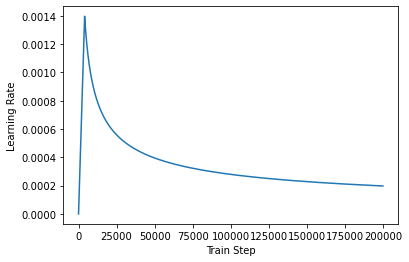

In [57]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### [4] 모델 컴파일
---
손실 함수와 커스텀 된 학습률(learning rate)을 사용하여 모델을 컴파일합니다.


In [58]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("model compile")

model compile


### [5] 훈련하기
---
총 20 에포크를 학습합니다.



In [59]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 13s 69ms/step - loss: 2.4399 - accuracy: 0.0357
Epoch 2/20
185/185 [==============================] - 13s 70ms/step - loss: 1.9883 - accuracy: 0.0800
Epoch 3/20
185/185 [==============================] - 12s 67ms/step - loss: 1.6995 - accuracy: 0.0855
Epoch 4/20
185/185 [==============================] - 13s 69ms/step - loss: 1.5823 - accuracy: 0.0914
Epoch 5/20
185/185 [==============================] - 13s 69ms/step - loss: 1.5038 - accuracy: 0.0954
Epoch 6/20
185/185 [==============================] - 12s 67ms/step - loss: 1.4238 - accuracy: 0.1002
Epoch 7/20
185/185 [==============================] - 12s 66ms/step - loss: 1.3333 - accuracy: 0.1063
Epoch 8/20
185/185 [==============================] - 12s 66ms/step - loss: 1.2304 - accuracy: 0.1153
Epoch 9/20
185/185 [==============================] - 12s 66ms/step - loss: 1.1191 - accuracy: 0.1270
Epoch 10/20
185/185 [==============================] - 12s 66ms/step - loss: 1.001

## 5. 모델 평가하기
입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

### 챗봇 테스트하기
예측(inference) 단계는 기본적으로 다음과 같은 과정을 거칩니다.

1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.
2. 입력 문장을 토크나이징하고, **START_TOKEN**과 **END_TOKEN**을 추가한다.
3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.
4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.
5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.
6. **END_TOKEN**이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.

위의 과정을 모두 담은 **decoder_inference()** 함수를 만듭니다.

In [60]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

임의의 입력 문장에 대해서 **decoder_inference()** 함수를 호출하여 챗봇의 대답을 얻는 **sentence_generation()** 함수를 만듭니다.

In [61]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

In [62]:
sentence_generation('안녕하세요')

입력 : 안녕하세요
출력 : 안녕하세요 .


'안녕하세요 .'

In [63]:
sentence_generation("요즘 외로워")

입력 : 요즘 외로워
출력 : 혼자가 아니에요 .


'혼자가 아니에요 .'

In [67]:
sentence_generation("요즘 잘지내")

입력 : 요즘 잘지내
출력 : 잘 지낼 거예요 .


'잘 지낼 거예요 .'

In [68]:
sentence_generation("너 왜 그렇게 낯설어")

입력 : 너 왜 그렇게 낯설어
출력 : 어흥 ! ! 호랑이보다 무섭나요 ?


'어흥 ! ! 호랑이보다 무섭나요 ?'

In [70]:
sentence_generation("나 요즘 심심해")

입력 : 나 요즘 심심해
출력 : 저도요 .


'저도요 .'

In [73]:
sentence_generation("같이 놀래?")

입력 : 같이 놀래?
출력 : 저랑 놀아요 .


'저랑 놀아요 .'

In [74]:
sentence_generation("고마워")

입력 : 고마워
출력 : 감사합니다 .


'감사합니다 .'

생각보다 chatbot이 더 잘 학습되어서 좋은 결과들이 많이 나왔네요.

그리고 chatbot에서 사용한 데이터 특성상 위로해 주는 문장이 들어갔을때 더 좋은 답변이 나오네요.

---

## 회고

- chatbot 프로젝트를 진행하면서 여러 이론들을 이해하기 어려웠고 잘 될지 감이 안잡혔지만 만족할만한 결과가 나와서 다행이라고 생각이 들었습니다.  그리고 출력 문장을 보면서 실제 있는 휴대폰 어플인 심심이가 생각이 나면서 저랑 대화를 한다는 느낌이 들었습니다.  


- 실제론 그저 주어진 Questions에 대해 Answers를 학습한 딥러닝 모델의 불가하지만, 그래도 입력 : "같이 놀래?"를 적을때 출력에서 "저랑 놀아요."가 나오자 단순히 계산에 의하여 학습된 장치에 불가하지만 따뜻한 위로를 받는 느낌이 들었습니다.  
그래서 이 프로젝트를 하면서 만약 더 정교한 질문도 괜찮은 답변을하는 **chatbot**을 만들 수 있다면, 일상 생활 속에서 외롭거나 힘들때 대화를 해서 위로를 얻을 가능성을 봤습니다.  
제가 만든 간단한 모델에서도 저 스스로 어떤 느낌을 얻었으니까요


- 모든 사람들이 지금 안좋은 시기를 겪고 있습니다. 연령에 상관없이 모든 사람이 힘든 상활을 겪고 있죠. 이럴때 서로 힘든 사람들끼리 '나 요새 힘들다...  , 너도 그러냐 나도 요새 힘들다 진짜'와 같이 서로 격려해주기 힘든 상황에 이런 **chatbot**이 서로 격려를 해줄 수 있는 하나의 방안이 될 수 있을것 같아서 프로젝트를 하면서도 더 공부하고 싶어졌네요. 


- 저는 chatbot 기술이 좀 더 서로 격려하고 위로하는 사회를 만드는 하나의 손길과 같은 기술이라고 생각이 듭니다. 그래서 앞으로 chatbot 분야에서 어떤 기술이 나올지 너무 기대가 되네요.